In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
import tensorflow as tf

2024-02-26 15:24:37.435133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import our input dataset
salary_df = pd.read_csv('ds_salaries.csv')
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
salary_df.drop(salary_df[["salary", "salary_currency"]], axis = 1, inplace=True)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [4]:
 # Check the number of unique values in each column
salary_df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [5]:
salary_df["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [6]:
engineer = '.*Engineer'
salary_df[salary_df['job_title'].str.contains(engineer)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
21,2023,SE,FT,Research Engineer,275000,DE,0,DE,M
22,2023,SE,FT,Research Engineer,174000,DE,0,DE,M
23,2023,SE,FT,Analytics Engineer,230000,GB,100,GB,M
...,...,...,...,...,...,...,...,...,...
3723,2021,SE,FT,Computer Vision Engineer,18907,BR,0,BR,M
3739,2021,MI,FT,Data Engineer,45391,NL,100,NL,L
3743,2020,MI,FT,Data Engineer,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S


In [7]:
analyst = '.*Analyst'
salary_df[salary_df['job_title'].str.contains(analyst)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,2023,SE,FT,Data Analyst,130000,US,100,US,M
12,2023,SE,FT,Data Analyst,100000,US,100,US,M
19,2023,MI,FT,Data Analyst,150000,US,100,US,M
20,2023,MI,FT,Data Analyst,110000,US,100,US,M
37,2023,MI,FT,Data Analyst,105380,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3724,2021,EN,FT,Business Data Analyst,59102,LU,100,LU,L
3734,2021,MI,FT,Lead Data Analyst,19609,IN,100,IN,L
3736,2021,MI,FT,Data Analyst,75000,US,0,US,L
3737,2021,MI,FT,Data Analyst,62000,US,0,US,L


In [8]:
scientist = '.*Scientist'
salary_df[salary_df['job_title'].str.contains(scientist)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...
3746,2021,MI,FT,Data Scientist,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L


In [9]:
engineer = 'Engineer'
analyst = 'Analyst'
scientist = 'Scientist'

for idx, x in enumerate(salary_df["job_title"]):
    if engineer in x:
        salary_df.at[idx, "job_title"] = "Data Engineer"
    elif analyst in x:
        salary_df.at[idx, "job_title"] = "Data Analyst"
    elif scientist in x:
        salary_df.at[idx, "job_title"] = "Data Scientist"
    else:
        salary_df.at[idx, "job_title"] = "Other"
salary_df["job_title"]

0       Data Scientist
1        Data Engineer
2        Data Engineer
3       Data Scientist
4       Data Scientist
             ...      
3750    Data Scientist
3751    Data Scientist
3752    Data Scientist
3753      Data Analyst
3754             Other
Name: job_title, Length: 3755, dtype: object

In [10]:
salary_df["job_title"].value_counts()

Data Engineer     1640
Data Scientist    1065
Data Analyst       684
Other              366
Name: job_title, dtype: int64

In [11]:
salary_df["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [12]:
US = "US"
for idx, x in enumerate(salary_df["employee_residence"]):
    if US in x:
        salary_df.at[idx, "employee_residence"] = "US"
    else:
        salary_df.at[idx, "employee_residence"] = "Other"
salary_df["employee_residence"].head()

0    Other
1       US
2       US
3    Other
4    Other
Name: employee_residence, dtype: object

In [13]:
salary_df["employee_residence"].value_counts()

US       3004
Other     751
Name: employee_residence, dtype: int64

In [14]:
salary_df["company_location"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [15]:
for idx, x in enumerate(salary_df["company_location"]):
    if US in x:
        salary_df.at[idx, "company_location"] = "US"
    else:
        salary_df.at[idx, "company_location"] = "Other"
salary_df["company_location"].head()

0    Other
1       US
2       US
3    Other
4    Other
Name: company_location, dtype: object

In [16]:
salary_df["company_location"].value_counts()

US       3040
Other     715
Name: company_location, dtype: int64

In [17]:
salary_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [18]:
salary_df["work_year"] = salary_df["work_year"].astype(str)
salary_df["remote_ratio"] = salary_df["remote_ratio"].astype(str)

salary_df.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [19]:
# change experience level abreviations for clarity
salary_df['experience_level'] = salary_df['experience_level'].replace('EN', 'Entry-level')
salary_df['experience_level'] = salary_df['experience_level'].replace('MI', 'Intermediate')
salary_df['experience_level'] = salary_df['experience_level'].replace('SE', 'Senior-level')
salary_df['experience_level'] = salary_df['experience_level'].replace('EX', 'Executive-level')


In [20]:
# change employeement_type abreviations for clarity
salary_df['employment_type'] = salary_df['employment_type'].replace('FT', 'Full-Time')
salary_df['employment_type'] = salary_df['employment_type'].replace('PT', 'Part-Time')
salary_df['employment_type'] = salary_df['employment_type'].replace('CT', 'Contract')
salary_df['employment_type'] = salary_df['employment_type'].replace('FL', 'Freelance')

In [ ]:
# filter to employees with residence in the US
# salary_df = salary_df[(salary_df['employee_residence'] == 'US')]
# salary_df.head(10)

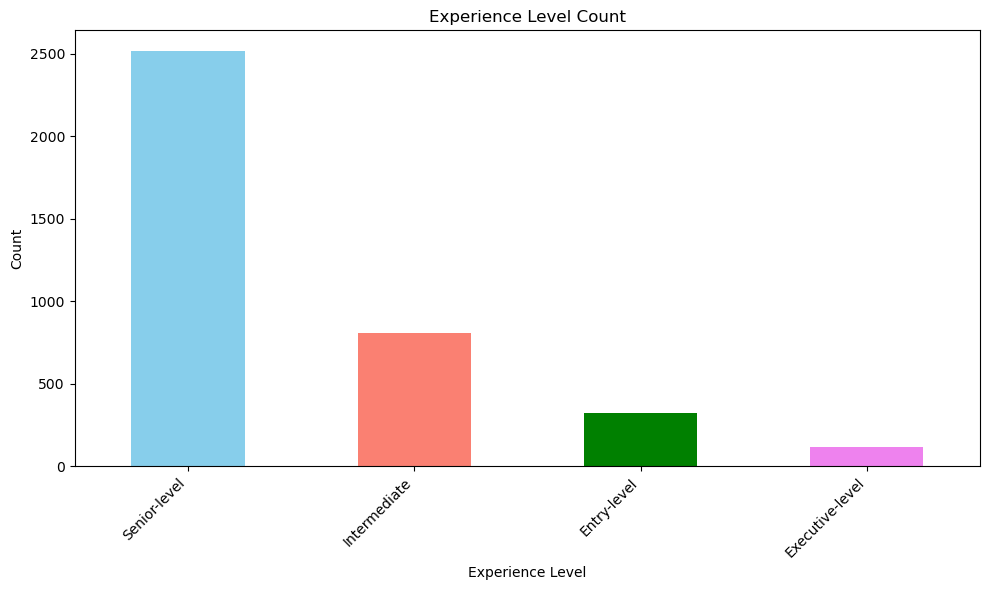

In [21]:
# Count the occurrences of each experience level
experience_level_counts = salary_df['experience_level'].value_counts()

# Define colors for each job title
colors = ['skyblue', 'salmon', 'green', 'violet']

# Plotting the bar chart with specified colors
experience_level_counts.plot(kind='bar', color=colors, figsize=(10, 6))

# Adding labels and title
plt.title('Experience Level Count')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[Text(0, 0, '0'), Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0')]

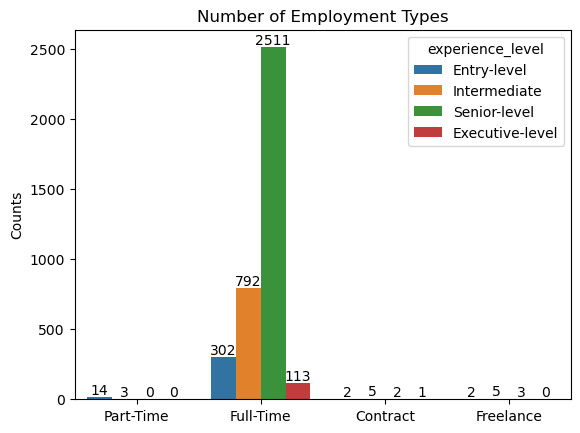

In [35]:
# Count of employment type by experience

import seaborn as sns

fig, ax = plt.subplots()
sns.countplot(ax = ax, data = salary_df, x = salary_df.employment_type, hue = 'experience_level')
ax.set(xlabel='', ylabel='Counts', title='Number of Employment Types')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

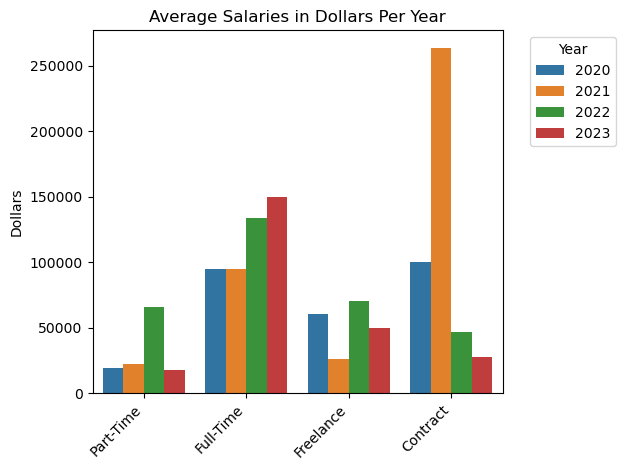

In [36]:
# Calculate average salaries and sort by descending order
avg_salaries = salary_df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending=False).reset_index()

# Sort the salary_df by work_year
salary_df = salary_df.sort_values(by='work_year')

# Plotting
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=salary_df, x='employment_type', y='salary_in_usd', hue='work_year', errorbar=None)
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

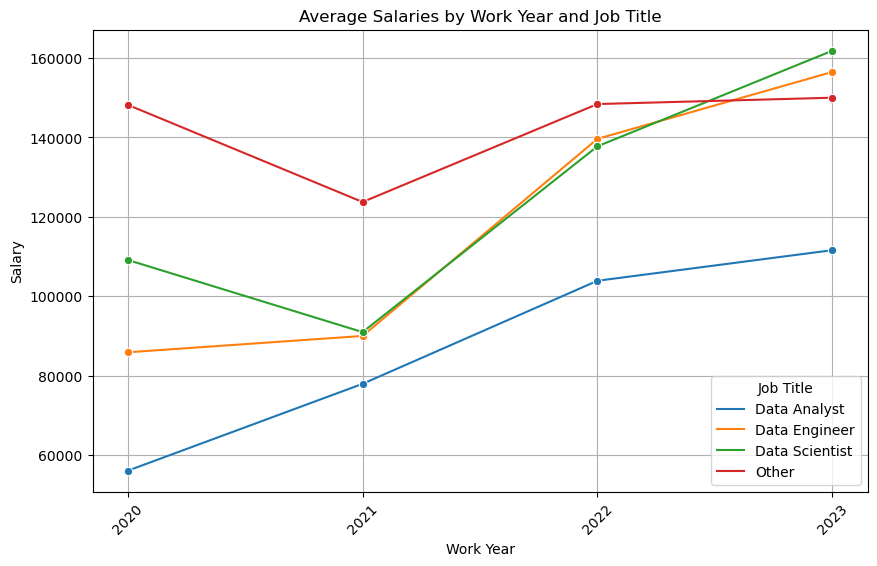

In [37]:
# Salary by year by job title
# Group data by work_year and job_title and calculate the mean salary
year_job_salary = salary_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_job_salary, x='work_year', y='salary_in_usd', hue='job_title', marker='o')

# Adding labels and title
plt.title("Average Salaries by Work Year and Job Title")
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.legend(title='Job Title')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
